In [158]:

import numpy as np
import mne_bids
from mne_bids import BIDSPath, read_raw_bids
import matplotlib.pyplot as plt
import pandas as pd 
"""
Idé: 

Format för input till modellen 
Ex np.array(89, 4, 10000) 
Två npz-filer, en för träningsdata och en för testdata, många personer och få windows

1 - Ladda hela datasetet för alla subjekt
2 - Välj ut vilka datapunkter vi vill ha med (Hur många från varje kontrollgrupp)
3 - Resample till önskad frekvens
4 - Välj ut vilka kanaler vi vill ha med
5 - Ta bort första x sista y minuter (Gör för alla personer, alla kanaler)
6 - Ta bort alla avvikelser som är större än
7 - Normalisera datan över kanaler (Normalisera till 0 mean och 1 std) (Använd bibliotek)
8 - Dela upp i fönster med en bestämd längd

Slutprodukt: Spara som dataframe 
# training_data_f = person X kanaler X datapunker/tid(10 s)
# {person 1.1 : {k1: xxxxxxxxxx, k2: xxx, k3: xxx}} Y=dement
# {person 1.2 : {k1: xxx, k2: xxx, k3: xxx}} Y = dement
# {person 1.3 : {k1: xxx, k2: xxx, k3: xxx}}
# {person 2.1 : {k1: xxx, k2: xxx, k3: xxx}} Y = frisk
# {person 2.2 : {k1: xxx, k2: xxx, k3: xxx}}
# {person 2.3 : {k1: xxx, k2: xxx, k3: xxx}}

"""

parameters = {
    "sampling_frequency": 100,
    "minutes_to_remove_beginning": 2,
    "minutes_to_remove_end": 2,
    "normalize": True,
    "num_A": 15, # Antal personer med Alzheimers
    "num_F": 0, # Antal personer med Frontotemporal demens
    "num_C": 15, # Antal personer från kontrollgruppen
    "test_size": 0.2,
    "train_size": 0.8,
    "channels": ['time', 'Fp1', 'Fp2', 'Cz', 'Pz'] , # Namn på kanalerna som
    "window_size": 20, # Window size i sekunder
    "random_seed": 42,
    "clip_lower": -200,
    "clip_higher": 200
}



In [141]:
import os

bids_root = './data/' 
task = 'eyesclosed'
datatype = 'eeg'
suffix = 'eeg'

df = []

for filename in os.listdir(bids_root):
    if filename.startswith("sub"):
        subject_id = filename.replace("sub-", "")
        bids_path = BIDSPath(subject=subject_id, task=task, datatype=datatype, suffix=suffix, extension='.set', root=bids_root, check=False)
        raw = read_raw_bids(bids_path, verbose=True)
        raw.resample(sfreq=parameters["sampling_frequency"])
        data = raw.to_data_frame()
        df.append({"subject_id": raw.info['subject_info']['his_id'], "data": data, "Y": raw.info['subject_info']['Group']})
        


Reading channel info from data/sub-021/eeg/sub-021_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-021_task-eyesclosed.

The search_str was "data/sub-021/**/eeg/sub-021*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-026/eeg/sub-026_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-026_task-eyesclosed.

The search_str was "data/sub-026/**/eeg/sub-026*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-019/eeg/sub-019_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-019_task-eyesclosed.

The search_str was "data/sub-019/**/eeg/sub-019*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-010/eeg/sub-010_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-010_task-eyesclosed.

The search_str was "data/sub-010/**/eeg/sub-010*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-017/eeg/sub-017_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-017_task-eyesclosed.

The search_str was "data/sub-017/**/eeg/sub-017*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-028/eeg/sub-028_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-028_task-eyesclosed.

The search_str was "data/sub-028/**/eeg/sub-028*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-088/eeg/sub-088_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-088_task-eyesclosed.

The search_str was "data/sub-088/**/eeg/sub-088*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-043/eeg/sub-043_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-043_task-eyesclosed.

The search_str was "data/sub-043/**/eeg/sub-043*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-044/eeg/sub-044_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-044_task-eyesclosed.

The search_str was "data/sub-044/**/eeg/sub-044*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-086/eeg/sub-086_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-086_task-eyesclosed.

The search_str was "data/sub-086/**/eeg/sub-086*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-072/eeg/sub-072_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-072_task-eyesclosed.

The search_str was "data/sub-072/**/eeg/sub-072*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-075/eeg/sub-075_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-075_task-eyesclosed.

The search_str was "data/sub-075/**/eeg/sub-075*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-081/eeg/sub-081_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-081_task-eyesclosed.

The search_str was "data/sub-081/**/eeg/sub-081*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-016/eeg/sub-016_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-016_task-eyesclosed.

The search_str was "data/sub-016/**/eeg/sub-016*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-029/eeg/sub-029_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-029_task-eyesclosed.

The search_str was "data/sub-029/**/eeg/sub-029*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-011/eeg/sub-011_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-011_task-eyesclosed.

The search_str was "data/sub-011/**/eeg/sub-011*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-027/eeg/sub-027_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-027_task-eyesclosed.

The search_str was "data/sub-027/**/eeg/sub-027*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-018/eeg/sub-018_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-018_task-eyesclosed.

The search_str was "data/sub-018/**/eeg/sub-018*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-020/eeg/sub-020_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-020_task-eyesclosed.

The search_str was "data/sub-020/**/eeg/sub-020*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-080/eeg/sub-080_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-080_task-eyesclosed.

The search_str was "data/sub-080/**/eeg/sub-080*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-074/eeg/sub-074_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-074_task-eyesclosed.

The search_str was "data/sub-074/**/eeg/sub-074*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-073/eeg/sub-073_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-073_task-eyesclosed.

The search_str was "data/sub-073/**/eeg/sub-073*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-087/eeg/sub-087_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-087_task-eyesclosed.

The search_str was "data/sub-087/**/eeg/sub-087*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-045/eeg/sub-045_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-045_task-eyesclosed.

The search_str was "data/sub-045/**/eeg/sub-045*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-042/eeg/sub-042_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-042_task-eyesclosed.

The search_str was "data/sub-042/**/eeg/sub-042*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-060/eeg/sub-060_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-060_task-eyesclosed.

The search_str was "data/sub-060/**/eeg/sub-060*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-067/eeg/sub-067_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-067_task-eyesclosed.

The search_str was "data/sub-067/**/eeg/sub-067*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-058/eeg/sub-058_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-058_task-eyesclosed.

The search_str was "data/sub-058/**/eeg/sub-058*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-051/eeg/sub-051_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-051_task-eyesclosed.

The search_str was "data/sub-051/**/eeg/sub-051*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-056/eeg/sub-056_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-056_task-eyesclosed.

The search_str was "data/sub-056/**/eeg/sub-056*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-069/eeg/sub-069_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-069_task-eyesclosed.

The search_str was "data/sub-069/**/eeg/sub-069*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-002/eeg/sub-002_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-002_task-eyesclosed.

The search_str was "data/sub-002/**/eeg/sub-002*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-005/eeg/sub-005_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-005_task-eyesclosed.

The search_str was "data/sub-005/**/eeg/sub-005*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-033/eeg/sub-033_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-033_task-eyesclosed.

The search_str was "data/sub-033/**/eeg/sub-033*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-034/eeg/sub-034_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-034_task-eyesclosed.

The search_str was "data/sub-034/**/eeg/sub-034*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-057/eeg/sub-057_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-057_task-eyesclosed.

The search_str was "data/sub-057/**/eeg/sub-057*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-068/eeg/sub-068_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-068_task-eyesclosed.

The search_str was "data/sub-068/**/eeg/sub-068*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-050/eeg/sub-050_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-050_task-eyesclosed.

The search_str was "data/sub-050/**/eeg/sub-050*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-066/eeg/sub-066_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-066_task-eyesclosed.

The search_str was "data/sub-066/**/eeg/sub-066*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-059/eeg/sub-059_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-059_task-eyesclosed.

The search_str was "data/sub-059/**/eeg/sub-059*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-061/eeg/sub-061_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-061_task-eyesclosed.

The search_str was "data/sub-061/**/eeg/sub-061*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-035/eeg/sub-035_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-035_task-eyesclosed.

The search_str was "data/sub-035/**/eeg/sub-035*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-032/eeg/sub-032_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-032_task-eyesclosed.

The search_str was "data/sub-032/**/eeg/sub-032*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-004/eeg/sub-004_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-004_task-eyesclosed.

The search_str was "data/sub-004/**/eeg/sub-004*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-003/eeg/sub-003_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-003_task-eyesclosed.

The search_str was "data/sub-003/**/eeg/sub-003*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-078/eeg/sub-078_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-078_task-eyesclosed.

The search_str was "data/sub-078/**/eeg/sub-078*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-047/eeg/sub-047_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-047_task-eyesclosed.

The search_str was "data/sub-047/**/eeg/sub-047*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-040/eeg/sub-040_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-040_task-eyesclosed.

The search_str was "data/sub-040/**/eeg/sub-040*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-049/eeg/sub-049_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-049_task-eyesclosed.

The search_str was "data/sub-049/**/eeg/sub-049*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-076/eeg/sub-076_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-076_task-eyesclosed.

The search_str was "data/sub-076/**/eeg/sub-076*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-082/eeg/sub-082_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-082_task-eyesclosed.

The search_str was "data/sub-082/**/eeg/sub-082*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-085/eeg/sub-085_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-085_task-eyesclosed.

The search_str was "data/sub-085/**/eeg/sub-085*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-071/eeg/sub-071_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-071_task-eyesclosed.

The search_str was "data/sub-071/**/eeg/sub-071*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-025/eeg/sub-025_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-025_task-eyesclosed.

The search_str was "data/sub-025/**/eeg/sub-025*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-022/eeg/sub-022_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-022_task-eyesclosed.

The search_str was "data/sub-022/**/eeg/sub-022*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-014/eeg/sub-014_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-014_task-eyesclosed.

The search_str was "data/sub-014/**/eeg/sub-014*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-013/eeg/sub-013_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-013_task-eyesclosed.

The search_str was "data/sub-013/**/eeg/sub-013*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-070/eeg/sub-070_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-070_task-eyesclosed.

The search_str was "data/sub-070/**/eeg/sub-070*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-084/eeg/sub-084_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-084_task-eyesclosed.

The search_str was "data/sub-084/**/eeg/sub-084*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-048/eeg/sub-048_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-048_task-eyesclosed.

The search_str was "data/sub-048/**/eeg/sub-048*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-083/eeg/sub-083_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-083_task-eyesclosed.

The search_str was "data/sub-083/**/eeg/sub-083*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-077/eeg/sub-077_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-077_task-eyesclosed.

The search_str was "data/sub-077/**/eeg/sub-077*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-041/eeg/sub-041_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-041_task-eyesclosed.

The search_str was "data/sub-041/**/eeg/sub-041*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-079/eeg/sub-079_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-079_task-eyesclosed.

The search_str was "data/sub-079/**/eeg/sub-079*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-046/eeg/sub-046_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-046_task-eyesclosed.

The search_str was "data/sub-046/**/eeg/sub-046*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-012/eeg/sub-012_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-012_task-eyesclosed.

The search_str was "data/sub-012/**/eeg/sub-012*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-015/eeg/sub-015_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-015_task-eyesclosed.

The search_str was "data/sub-015/**/eeg/sub-015*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-023/eeg/sub-023_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-023_task-eyesclosed.

The search_str was "data/sub-023/**/eeg/sub-023*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-024/eeg/sub-024_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-024_task-eyesclosed.

The search_str was "data/sub-024/**/eeg/sub-024*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-039/eeg/sub-039_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-039_task-eyesclosed.

The search_str was "data/sub-039/**/eeg/sub-039*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-006/eeg/sub-006_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-006_task-eyesclosed.

The search_str was "data/sub-006/**/eeg/sub-006*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-001/eeg/sub-001_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-001_task-eyesclosed.

The search_str was "data/sub-001/**/eeg/sub-001*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-008/eeg/sub-008_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-008_task-eyesclosed.

The search_str was "data/sub-008/**/eeg/sub-008*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-037/eeg/sub-037_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-037_task-eyesclosed.

The search_str was "data/sub-037/**/eeg/sub-037*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-030/eeg/sub-030_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-030_task-eyesclosed.

The search_str was "data/sub-030/**/eeg/sub-030*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-064/eeg/sub-064_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-064_task-eyesclosed.

The search_str was "data/sub-064/**/eeg/sub-064*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-063/eeg/sub-063_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-063_task-eyesclosed.

The search_str was "data/sub-063/**/eeg/sub-063*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-055/eeg/sub-055_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-055_task-eyesclosed.

The search_str was "data/sub-055/**/eeg/sub-055*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-052/eeg/sub-052_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-052_task-eyesclosed.

The search_str was "data/sub-052/**/eeg/sub-052*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-031/eeg/sub-031_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-031_task-eyesclosed.

The search_str was "data/sub-031/**/eeg/sub-031*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-009/eeg/sub-009_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-009_task-eyesclosed.

The search_str was "data/sub-009/**/eeg/sub-009*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-036/eeg/sub-036_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-036_task-eyesclosed.

The search_str was "data/sub-036/**/eeg/sub-036*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-038/eeg/sub-038_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-038_task-eyesclosed.

The search_str was "data/sub-038/**/eeg/sub-038*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-007/eeg/sub-007_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-007_task-eyesclosed.

The search_str was "data/sub-007/**/eeg/sub-007*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-053/eeg/sub-053_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-053_task-eyesclosed.

The search_str was "data/sub-053/**/eeg/sub-053*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-054/eeg/sub-054_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-054_task-eyesclosed.

The search_str was "data/sub-054/**/eeg/sub-054*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-062/eeg/sub-062_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-062_task-eyesclosed.

The search_str was "data/sub-062/**/eeg/sub-062*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


Reading channel info from data/sub-065/eeg/sub-065_task-eyesclosed_channels.tsv.


/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path, verbose=True)
/var/folders/_j/hc6yz5ys04z66vnnmxnn2x780000gn/T/ipykernel_1319/178021267.py:14: RuntimeWarning: Did not find any events.tsv associated with sub-065_task-eyesclosed.

The search_str was "data/sub-065/**/eeg/sub-065*events.tsv"
  raw = read_raw_bids(bids_path, verbose=True)


In [142]:
print(f"DF before removal {len(df)}")
outliers_ids = ['sub-026', 'sub-044', 'sub-063'] # Remove outliers given information from t-SNE plot 
df = [x for x in df if x['subject_id'] not in outliers_ids]

print(f"DF after removal {len(df)}")
df_copy = df.copy()

DF before removal 88
DF after removal 85


In [143]:
# 2 - Välj ut vilka datapunkter vi vill ha med (Hur många från varje kontrollgrupp)
np.random.seed(parameters["random_seed"])

A_indicies = np.random.choice([i for i, x in enumerate(df) if x['Y'] == 'A'], parameters["num_A"], replace=False)
F_indicies = np.random.choice([i for i, x in enumerate(df) if x['Y'] == 'F'], parameters["num_F"], replace=False)
C_indicies = np.random.choice([i for i, x in enumerate(df) if x['Y'] == 'C'], parameters["num_C"], replace=False)

print(f"A Indicies: {A_indicies}")
print(f"F Indicies: {F_indicies}")
print(f"C Indicies: {C_indicies}")

df = [df[i] for i in A_indicies] + [df[i] for i in F_indicies] + [df[i] for i in C_indicies]
np.random.shuffle(df)

    

A Indicies: [66 31 64 53 39 70 51 30 14 40 15 78  0  4 41]
F Indicies: []
C Indicies: [79  6 84 25 83 71 38 35 60 45 74 37 81 26 75]


In [144]:
# Välj ut vilka kanaler vi vill ha med

for item in df:
    for channel in item['data'].columns:
        if channel not in parameters['channels']:
            item['data'].drop(channel, axis=1, inplace=True)
            


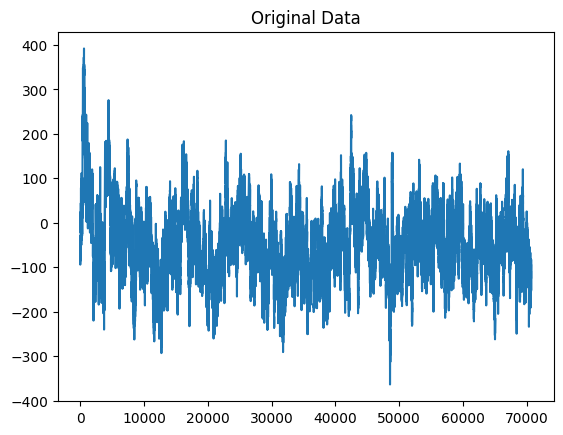

Processing time: start slice at 12000, end slice at 58710, original length 70710, new length 46710
Processing Fp1: start slice at 12000, end slice at 58710, original length 70710, new length 46710
Processing Fp2: start slice at 12000, end slice at 58710, original length 70710, new length 46710
Processing Cz: start slice at 12000, end slice at 58710, original length 70710, new length 46710
Processing Pz: start slice at 12000, end slice at 58710, original length 70710, new length 46710
Processing time: start slice at 12000, end slice at 72710, original length 84710, new length 60710
Processing Fp1: start slice at 12000, end slice at 72710, original length 84710, new length 60710
Processing Fp2: start slice at 12000, end slice at 72710, original length 84710, new length 60710
Processing Cz: start slice at 12000, end slice at 72710, original length 84710, new length 60710
Processing Pz: start slice at 12000, end slice at 72710, original length 84710, new length 60710
Processing time: start

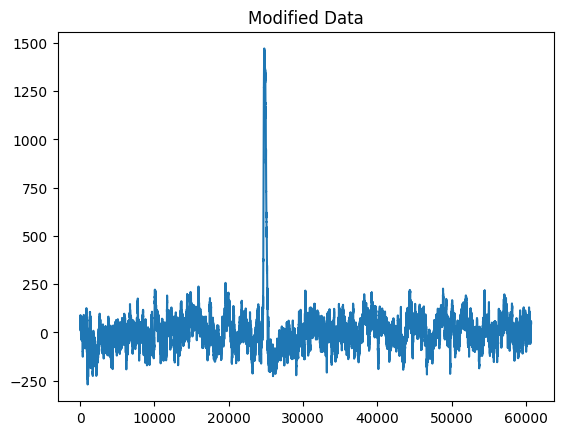

In [145]:
import matplotlib.pyplot as plt

plt.plot(df[0]['data']['Fp1'])
plt.title("Original Data")
plt.show()

timestep_given_sampling_frequency = df[0]['data']['time'][1]
datapoints_to_remove_beginning = int((parameters['minutes_to_remove_beginning'] * 60) / timestep_given_sampling_frequency)
datapoints_to_remove_end = int((parameters['minutes_to_remove_end'] * 60) / timestep_given_sampling_frequency)


for item in df:
    new_data = {}
    for channel in item['data'].columns:
        original_length = len(item['data'][channel])
        end_index = max(0, original_length - datapoints_to_remove_end)
        sliced_data = item['data'][channel][datapoints_to_remove_beginning:end_index]

        print(f"Processing {channel}: start slice at {datapoints_to_remove_beginning}, end slice at {end_index}, original length {original_length}, new length {len(sliced_data)}")
        
        new_data[channel] = sliced_data.reset_index(drop=True)

    item['data'] = pd.DataFrame(new_data)

print(df[0]['data'].head())
print(df[0]['data'].tail())

plt.plot(df[1]['data']['Fp1'])
plt.title("Modified Data")
plt.show()





In [146]:
# 6 - Ta bort alla avvikelser som är så stora att de kan bli outliers



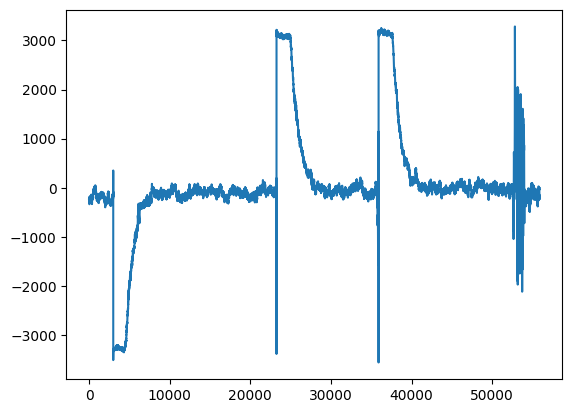

-207.39624601944584
93.65134008027721
Clipped Fp1:
0       -136.209821
1       -141.974578
2       -143.278716
3       -136.434756
4       -139.432037
            ...    
46705    -77.059797
46706    -55.208355
46707    -60.233727
46708    -58.360414
46709    -70.628683
Name: Fp1, Length: 46710, dtype: float64
-194.54256211646543
92.5429686509678
Clipped Fp2:
0       -73.412301
1       -80.867793
2       -89.179361
3       -71.398562
4       -84.598590
           ...    
46705   -72.771020
46706   -62.762442
46707   -45.885585
46708   -52.266999
46709   -83.209518
Name: Fp2, Length: 46710, dtype: float64
-135.1867030376864
117.10217450443369
Clipped Cz:
0       -31.266959
1       -41.084278
2       -43.892899
3       -42.863162
4       -40.402657
           ...    
46705   -11.736166
46706    -5.976418
46707    -8.522742
46708    -6.558894
46709   -26.657520
Name: Cz, Length: 46710, dtype: float64
-138.72898436839375
131.08302057636405
Clipped Pz:
0        33.583867
1        31.516008


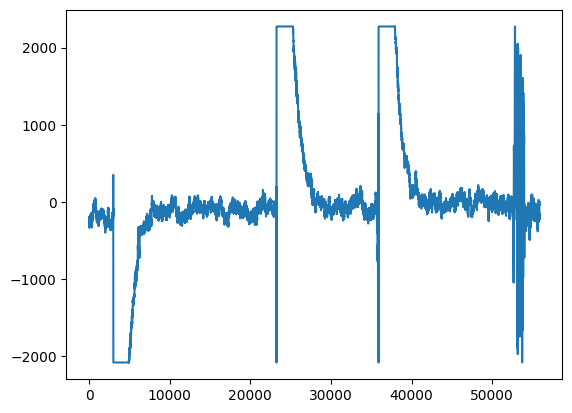

In [147]:
import numpy as np

# Define clipping thresholds
clip_lower = parameters['clip_lower']  
clip_upper = parameters['clip_higher']   

plt.plot(df[4]['data']['Fp1'])
plt.show()

for item in df:
    for channel in item['data'].columns:
        if channel == 'time':
            continue
        # Calculate mean and standard deviation
        mean_value = item['data'][channel].mean()
        std_dev = item['data'][channel].std()

        # Set clipping thresholds based on standard deviations
        clip_lower = mean_value - (2 * std_dev) # Clipping below 3 standard deviations of the mean
        clip_upper = mean_value + (2 * std_dev)
        print(clip_lower)
        print(clip_upper)
        # Clipping above 3 standard deviations of the mean

        # Apply clipping
        item['data'][channel] = item['data'][channel].clip(lower=clip_lower, upper=clip_upper)

        # Optional: print to check the results
        print(f"Clipped {channel}:")
        print(item["data"][channel])

        
        
plt.plot(df[4]['data']['Fp1'])
plt.show()



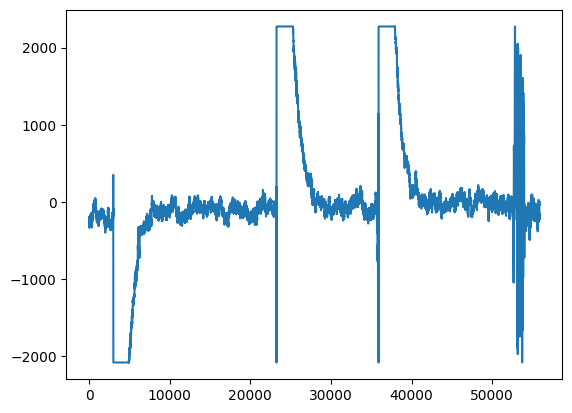

-57.06744588542449
72.41699074925829
-3.89421837624889e-17
0.9999999999999998
Normalized Fp1:
0   -1.092870
1   -1.172475
2   -1.190484
3   -1.095976
4   -1.137366
Name: Fp1, dtype: float64
-51.329084520132184
68.45571006081666
8.761991346560002e-17
1.0
Normalized Fp2:
0   -0.322591
1   -0.431501
2   -0.552916
3   -0.293175
4   -0.486000
Name: Fp2, dtype: float64
-9.037546356650687
60.78876684898052
2.9206637821866675e-17
1.0
Normalized Cz:
0   -0.365683
1   -0.527182
2   -0.573385
3   -0.556445
4   -0.515969
Name: Cz, dtype: float64
-3.729321872043037
64.7056370358238
-3.89421837624889e-17
1.0
Normalized Pz:
0    0.576661
1    0.544703
2    0.381161
3    0.316021
4    0.282999
Name: Pz, dtype: float64
-1.140285593624256
75.94219473211083
-3.2770872346043167e-17
1.0
Normalized Fp1:
0    0.802497
1    0.702294
2    0.667184
3    0.640827
4    0.519182
Name: Fp1, dtype: float64
34.743708822953025
70.25003297872625
-1.0486679150733813e-16
0.9999999999999999
Normalized Fp2:
0    1.138997
1

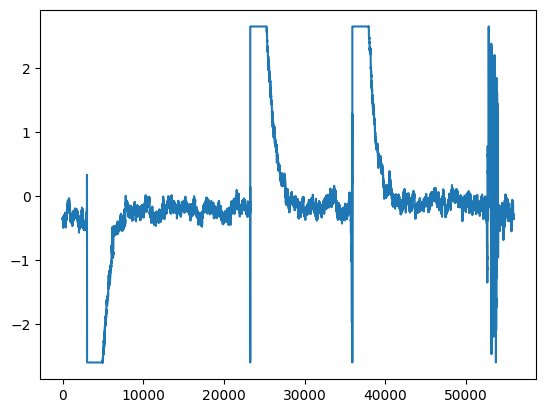

In [148]:
# Normalisera datan över kanaler (Normalisera till 0 mean och 1 std) 
plt.plot(df[4]['data']['Fp1'])
plt.show()


for item in df:
    for channel in item['data'].columns:
        if channel == 'time':
            continue
        # Calculate mean and standard deviation of the channel
        mean_value = item['data'][channel].mean()
        std_dev = item['data'][channel].std()
        print(mean_value)
        print(std_dev)

        # Standardize: (value - mean) / std_dev
        item['data'][channel] = (item['data'][channel] - mean_value) / std_dev
        
        print(item['data'][channel].mean())
        print(item['data'][channel].std())

        # Optional: print to check the results
        print(f"Normalized {channel}:")
        print(item["data"][channel].head())
        
        
plt.plot(df[4]['data']['Fp1'])
plt.show()


In [164]:
sampling_frequency = 1 / abs(df[0]['data']['time'][1] - df[0]['data']['time'][0]).round(2)
window_size = parameters['window_size']
datapoints_per_window = int(sampling_frequency * window_size)

windowed_data = [] 

for subject in df:
    num_windows = len(subject['data']) // datapoints_per_window
    for window_index in range(num_windows):
        start_index = window_index * datapoints_per_window
        end_index = start_index + datapoints_per_window
        windowed_df = subject['data'].iloc[start_index:end_index]
        new_subject_id = f"{subject['subject_id']}-{window_index + 1}"
        
        # Create a new dictionary for the windowed segment
        windowed_data.append({
            'subject_id': new_subject_id,
            'data': windowed_df,
            'Y': subject['Y']
        })

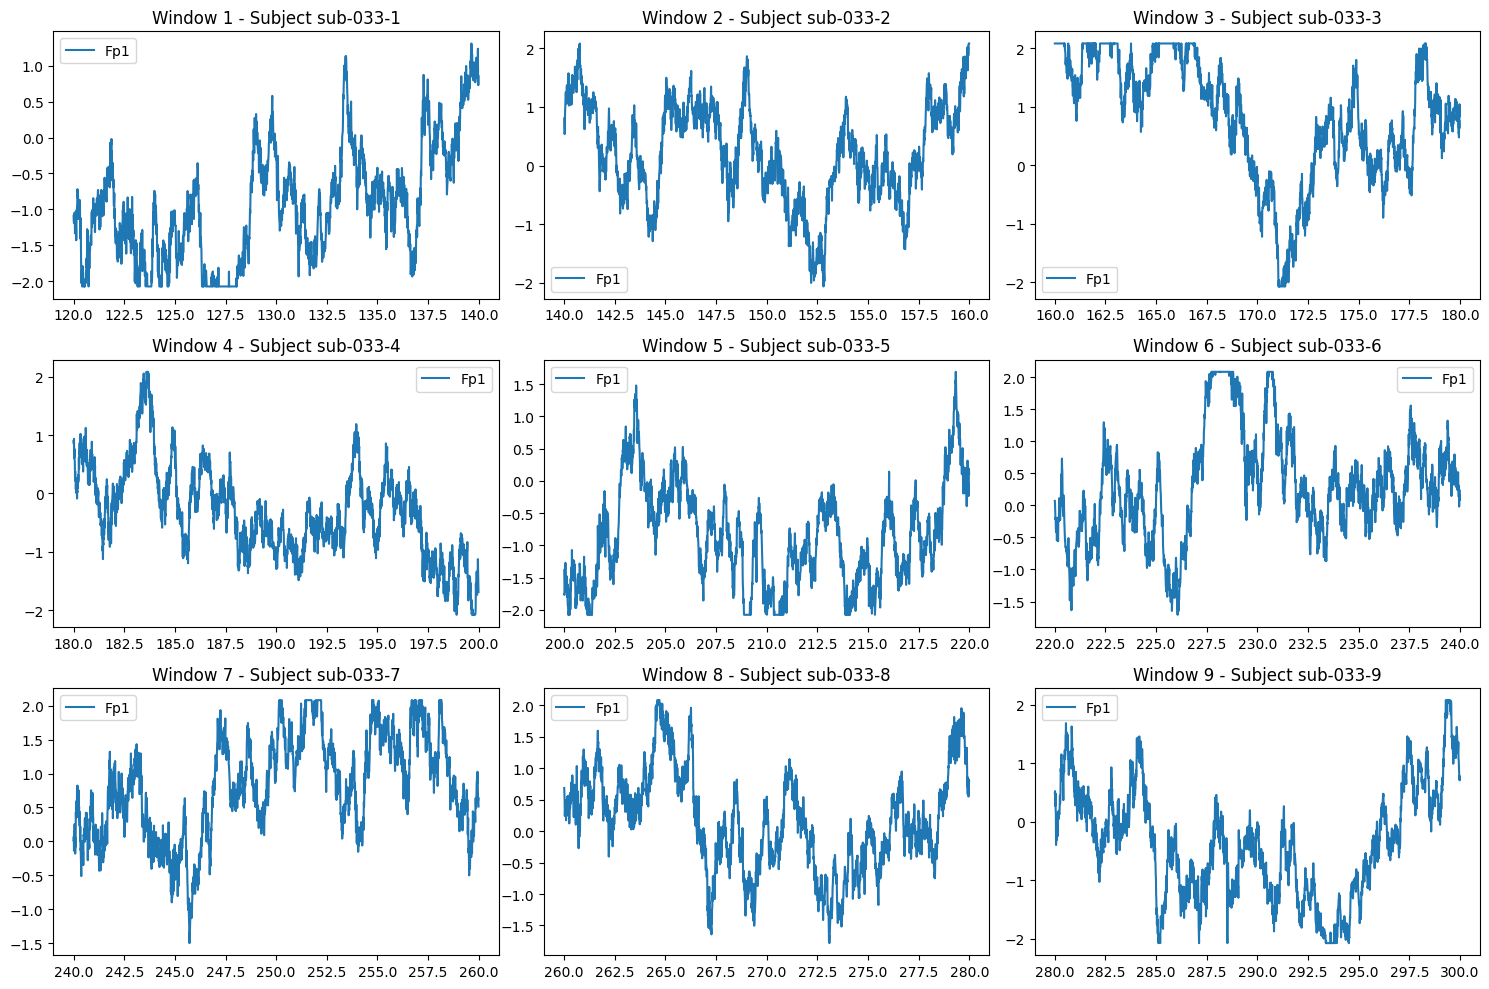

In [173]:
import matplotlib.pyplot as plt

# Number of windows to plot
num_windows_to_plot = min(9, len(windowed_data))  # Plot up to 9 windows or the total number of windows if less than 9

# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each window in a subplot
for i in range(num_windows_to_plot):
    window = windowed_data[i]
    ax = axes[i]
    ax.plot(window['data']['time'], window['data']['Fp1'], label='Fp1')
    ax.set_title(f"Window {i+1} - Subject {window['subject_id']}")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


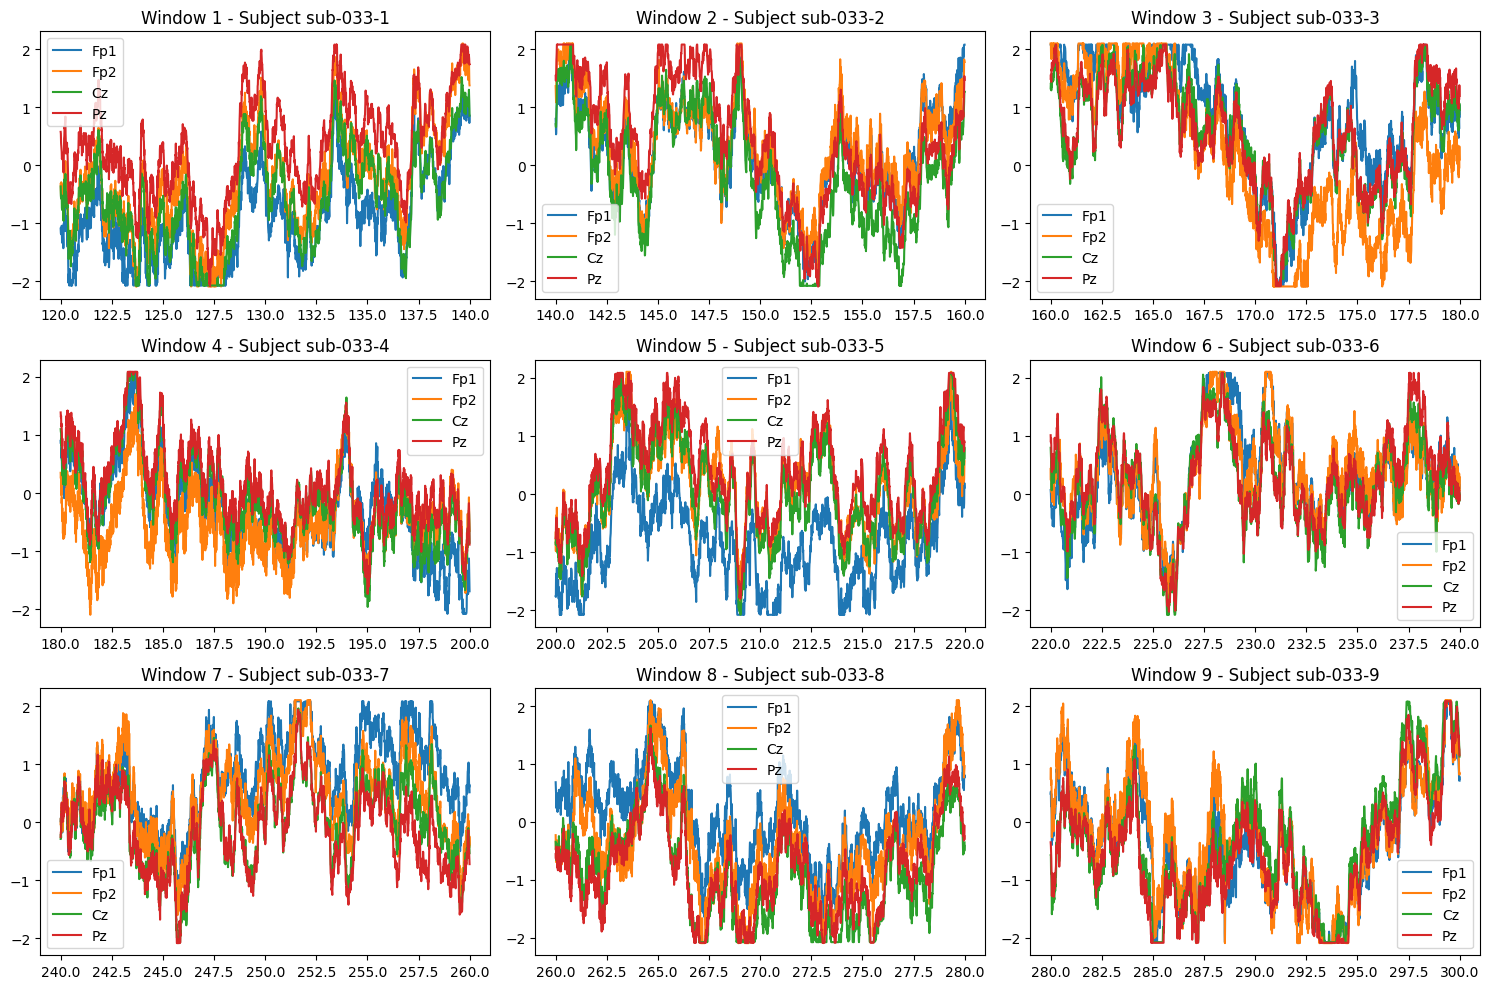

In [174]:
import matplotlib.pyplot as plt

# Number of windows to plot
num_windows_to_plot = min(9, len(windowed_data))  # Plot up to 9 windows or the total number of windows if less than 9

# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each window in a subplot
for i in range(num_windows_to_plot):
    window = windowed_data[i]
    ax = axes[i]
    for channel in parameters['channels']:
        if channel != 'time':
            ax.plot(window['data']['time'], window['data'][channel], label=channel)
    ax.set_title(f"Window {i+1} - Subject {window['subject_id']}")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()